<a href="https://colab.research.google.com/github/Sreeshbk/binance_datascience/blob/main/regression/L04_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization
Regularization attempts to minimize the RSS (residual sum of squares) and a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will actually cause non useful features to have a coefficient of zero, in which case the model does not consider the feature.

Let's explore two methods of regularization, Ridge Regression and Lasso. We'll combine these with the polynomial feature set (it wouldn't be as effective to perform regularization of a model on such a small original feature set of the original X).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv("./data/Advertising.csv")
print("Read the advertising dataset and extracting features and label X and y")
X = advertising.drop('Sales',axis=1)
y = advertising['Sales']
print(f" X[0] {X.iloc[0]}  and y[0] {y.iloc[0]}")

Read the advertising dataset and extracting features and label X and y
 X[0] Unnamed: 0      1.0
TV            230.1
Radio          37.8
Newspaper      69.2
Name: 0, dtype: float64  and y[0] 22.1


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Based on last notebook degree 3 was found to be a good model
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
print("poly_features[0] ",poly_features[0])


poly_features[0]  [1.00000000e+00 2.30100000e+02 3.78000000e+01 6.92000000e+01
 1.00000000e+00 2.30100000e+02 3.78000000e+01 6.92000000e+01
 5.29460100e+04 8.69778000e+03 1.59229200e+04 1.42884000e+03
 2.61576000e+03 4.78864000e+03 1.00000000e+00 2.30100000e+02
 3.78000000e+01 6.92000000e+01 5.29460100e+04 8.69778000e+03
 1.59229200e+04 1.42884000e+03 2.61576000e+03 4.78864000e+03
 1.21828769e+07 2.00135918e+06 3.66386389e+06 3.28776084e+05
 6.01886376e+05 1.10186606e+06 5.40101520e+04 9.88757280e+04
 1.81010592e+05 3.31373888e+05]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)


# Scaling the Data

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

While our particular data set has all the values in the same order of magnitude ($1000s of dollars spent), typically that won't be the case on a dataset, and since the mathematics behind regularized models will sum coefficients together, its important to standardize the features. Review the theory videos for more info, as well as a discussion on why we only fit to the training data, and transform on both sets separately.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X_train = scaler.transform(X_train)
X_test_original=X_test
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


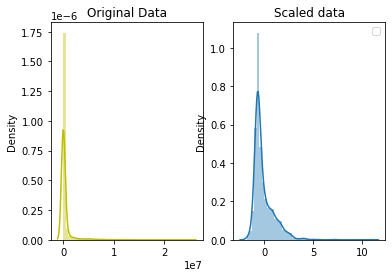

In [7]:
fig, ax=plt.subplots(1,2)
sns.distplot(X_test_original, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(X_test, ax=ax[1])
ax[1].set_title("Scaled data")
plt.legend()
plt.show()

## Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity(occurrence of high intercorrelations among two or more independent variables in a multiple regression model). This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.




In [8]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [11]:
test_predictions = ridge_model.predict(X_test)

In [9]:
ridge_model.coef_

array([-1.50648950e-01,  1.97280133e+00,  6.84683438e-01,  1.94890702e-03,
       -1.77273930e-01,  6.31536558e-01,  5.22861621e-02,  9.62175388e-02,
        2.34981078e-01,  1.59821047e+00,  3.58642161e-01,  1.95811582e-01,
        1.28158326e-01, -5.23622776e-02, -7.23620793e-02,  1.95045361e-01,
       -3.04197565e-02, -8.72725168e-02, -5.04420677e-01,  4.29419710e-01,
       -2.46915862e-01, -2.20060470e-01, -1.12936988e-02,  1.22988347e-01,
       -5.42553549e-01,  4.54058030e-01, -3.94928162e-01,  8.56825371e-01,
        1.59309612e-01,  4.68628345e-02, -9.72639754e-02, -4.99669102e-02,
       -2.85204349e-02, -6.83203443e-02])

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(f"ridge_model has a MAE {MAE}, MSE {MSE} and RMSE {RMSE}")

ridge_model has a MAE 0.6024567366034363, MSE 0.7516388521713991 and RMSE 0.8669710792012609


In [13]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE
print(f"MAE on trainingset {MAE}")

MAE on trainingset 0.5004349540730859


Choosing an alpha value with Cross-Validation

In [14]:
from sklearn.linear_model import RidgeCV
# Choosing a scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [15]:
ridge_cv_model.alpha_

0.1

In [16]:
test_predictions = ridge_cv_model.predict(X_test)

In [17]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(f"ridge_model has a MAE {MAE}, MSE {MSE} and RMSE {RMSE}")

ridge_model has a MAE 0.4865889206350245, MSE 0.3894620356102126 and RMSE 0.6240689349825167


In [18]:
# Training Set Performance
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE,ridge_cv_model.coef_

(0.31846548108903655,
 array([ 0.28802659,  5.28794592,  0.78143702,  0.49918755, -1.53573854,
         1.27461569, -0.88185399,  0.40776397, -5.59006231,  3.45727054,
        -1.06419005, -0.08137774, -0.09194615, -0.4595921 ,  0.81683338,
        -0.40129485,  1.13807079, -0.02649412, -0.4633815 , -0.11858033,
        -0.41902866, -0.32361982,  0.06078088,  0.04229031,  2.02812901,
        -0.44990994,  0.51578736,  0.71371534, -0.29209798,  0.53740378,
        -0.22815533,  0.54625496, -0.2460892 ,  0.13008384]))

## Lasso Regression

In [19]:
from sklearn.linear_model import LassoCV
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.1, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [20]:
lasso_cv_model.alpha_

0.4924531806474871

In [21]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(f"lasso_cv_model has a MAE {MAE}, MSE {MSE} and RMSE {RMSE}")

lasso_cv_model has a MAE 0.6811456342837985, MSE 1.0710443722690077 and RMSE 1.0349127365478732


In [22]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6860946674187014

In [23]:
lasso_cv_model.coef_

array([-0.        ,  0.97675148,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.8148913 ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

#ElasticNet

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [24]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)
elastic_model.l1_ratio_

0.95

In [25]:
test_predictions = elastic_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(f"elastic_model has a MAE {MAE}, MSE {MSE} and RMSE {RMSE}")

elastic_model has a MAE 0.6221087545664105, MSE 0.5776833516321037 and RMSE 0.7600548346218868


In [28]:
# Training Set Performance
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE,elastic_model.coef_

(0.40867524786255205,
 array([-4.48633962e-02,  3.80872862e+00,  1.16222890e+00,  1.52334055e-01,
         0.00000000e+00,  2.07798996e-01,  0.00000000e+00,  5.76086982e-02,
        -9.23835141e-01,  1.79323730e+00, -2.41688493e-01, -3.51315605e-02,
         5.50592965e-03,  1.54562133e-02,  7.44767506e-02,  4.53101269e-02,
        -3.37407037e-01, -2.63875994e-03, -3.74470210e-01,  4.72122287e-01,
        -8.81049715e-02, -5.35102956e-02,  0.00000000e+00,  9.55931465e-02,
        -9.31318745e-01,  3.84368862e-01, -0.00000000e+00,  8.28619410e-01,
         0.00000000e+00,  0.00000000e+00, -2.74084571e-01,  1.69925644e-02,
         7.42025730e-03,  0.00000000e+00]))

Other Regression Topics:

[Simple Linear Regression](./L01_simple_linear_regression.ipynb)   
[Linear Regression](./L01_linear_regression.ipynb)   
[Polynomial Regression](./L03_polynomial_regression.ipynb)        
[Regularization - Ridge-Lasso-ElasticNet](./L04_regularization.ipynb)

[Anscombes Quartet](./E01_anscombes_quartet.ipynb)